We need to segment existing customers based on their frequency and order value.


Ordering Breakfast via our website is a quite new habit that Marketing thinks could create more loyal
customers. 

Which segment could be a valuable target group for a Marketing campaign about
“Breakfast” cuisine_parent?
Use the provided csv or the table you’ve created, create user segments, answer the business
question, and prepare a presentation to share your findings/insights with the BI team.



In [1]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as tkr

In [3]:
df = pd.read_csv("your_filename")

In [4]:
df.head()

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534270 entries, 0 to 534269
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   order_id         534270 non-null  int64  
 1   user_id          534270 non-null  int64  
 2   order_timestamp  534270 non-null  object 
 3   city             534270 non-null  object 
 4   cuisine          534270 non-null  object 
 5   paid_cash        534270 non-null  bool   
 6   amount           534270 non-null  float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 25.0+ MB


In [6]:
#converting timestamps to actual timestamps
df["order_timestamp"] = pd.to_datetime(df["order_timestamp"])

In [7]:
df.head()

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28+00:00,Αίγιο,Breakfast,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50+00:00,Αγρίνιο,Breakfast,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12+00:00,Αγρίνιο,Breakfast,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05+00:00,Λιβαδειά,Breakfast,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28+00:00,Λιβαδειά,Breakfast,True,3.0


In [8]:
#Calculating percentage of Breakfast orders among all orders 
Breakfast_orders_per = len(df[df["cuisine"] == "Breakfast"]) / len(df) * 100
print(f'The percentage of breakfast orders among all orders is: {round(Breakfast_orders_per,2)} %')

The percentage of breakfast orders among all orders is: 38.92 %


In [10]:
#Creating a Breakfast df to merge later on and have an assessment of Breakfast ordering habits per segment
Breakfast_df = df.groupby('user_id').apply(lambda x: pd.Series({
    'breakfast_order_%': (x['cuisine'] == 'Breakfast').mean() * 100,
    'avg_Break_order': x.loc[x['cuisine'] == 'Breakfast', 'amount'].mean(),
    'breakfast_sum' : x.loc[x['cuisine'] == 'Breakfast', 'amount'].sum()

  })).reset_index()


In [11]:
Breakfast_df.fillna(0, inplace=True)

In [12]:
Breakfast_df.head()

,user_id,breakfast_order_%,avg_Break_order,breakfast_sum
0,44118921,0.000000,0.000000,0.0
1,108938802,0.000000,0.000000,0.0
2,110361993,9.090909,4.300000,4.3
3,138437670,0.000000,0.000000,0.0
4,144777339,100.000000,4.342857,60.8


In [13]:
User_Analysis = df.__deepcopy__()

In [14]:
#Starting FM analysis
User_Analysis = User_Analysis.groupby(["user_id"]).agg({
                                               "order_timestamp": pd.Series.nunique,
                                               "amount": np.sum,
                                               }).reset_index()

In [15]:
User_Analysis.rename(columns={ "order_timestamp":"frequency", "amount":"monetary"}, inplace = True)
User_Analysis.head()

,user_id,frequency,monetary
0,44118921,1,33.3
1,108938802,3,44.2
2,110361993,11,137.0
3,138437670,1,5.5
4,144777339,14,60.8


In [16]:
User_Analysis["frequency_score"] = pd.qcut(User_Analysis["frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])


User_Analysis["monetary_score"] = pd.qcut(User_Analysis["monetary"], 4,labels=[1, 2, 3, 4] )

User_Analysis.head()

,user_id,frequency,monetary,frequency_score,monetary_score
0,44118921,1,33.3,1,3
1,108938802,3,44.2,3,3
2,110361993,11,137.0,4,4
3,138437670,1,5.5,1,1
4,144777339,14,60.8,4,4


In [17]:
User_Analysis["FM_Segment"] =  User_Analysis["frequency_score"].astype(str) + User_Analysis["monetary_score"].astype(str)
User_Analysis.head()

,user_id,frequency,monetary,frequency_score,monetary_score,FM_Segment
0,44118921,1,33.3,1,3,13
1,108938802,3,44.2,3,3,33
2,110361993,11,137.0,4,4,44
3,138437670,1,5.5,1,1,11
4,144777339,14,60.8,4,4,44


In [18]:
segt_map = {
r'44': 'VIP',
r'34': 'Good Frequency and Excellent Monetary Value',
r'[1-2]4': 'Low Frequency and Excellent Monetary Value',
r'43': 'Excellent Frequency and Good Monetary Value',
r'33': 'Good Frequency and Good Monetary Value',
r'[1-2]3': 'Low Frequency and Good Monetary Value',
r'4[1-2]': 'Excellent Frequency and Low Monetary Value',
r'3[1-2]': 'Good Frequency and Low Monetary Value',
r'2[1-2]':'Low Frequency and Low Monetary Value', 
r'1[1-2]':'Worst Performers',
}

In [19]:
User_Analysis["segment_labels"] = User_Analysis["FM_Segment"]
User_Analysis["segment_labels"] = User_Analysis["segment_labels"].replace(segt_map, regex= True)
User_Analysis.head()

,user_id,frequency,monetary,frequency_score,monetary_score,FM_Segment,segment_labels
0,44118921,1,33.3,1,3,13,Low Frequency and Good Monetary Value
1,108938802,3,44.2,3,3,33,Good Frequency and Good Monetary Value
2,110361993,11,137.0,4,4,44,VIP
3,138437670,1,5.5,1,1,11,Worst Performers
4,144777339,14,60.8,4,4,44,VIP


In [20]:
User_Analysis.groupby('segment_labels')['user_id'].count()

segment_labels
Excellent Frequency and Good Monetary Value     6379
Excellent Frequency and Low Monetary Value       677
Good Frequency and Excellent Monetary Value     6253
Good Frequency and Good Monetary Value         15512
Good Frequency and Low Monetary Value           8720
Low Frequency and Excellent Monetary Value       778
Low Frequency and Good Monetary Value           8507
Low Frequency and Low Monetary Value           23093
VIP                                            23430
Worst Performers                               28594
Name: user_id, dtype: int64

In [21]:
User_Analysis['contribution'] = User_Analysis['monetary_score'].astype(float) * User_Analysis['frequency_score'].astype(float)

In [22]:
User_Analysis.groupby('segment_labels')['contribution'].sum().sort_values(ascending = False)

segment_labels
VIP                                            374880.0
Good Frequency and Good Monetary Value         139608.0
Excellent Frequency and Good Monetary Value     76548.0
Good Frequency and Excellent Monetary Value     75036.0
Low Frequency and Low Monetary Value            71602.0
Good Frequency and Low Monetary Value           49170.0
Low Frequency and Good Monetary Value           45600.0
Worst Performers                                37950.0
Low Frequency and Excellent Monetary Value       5912.0
Excellent Frequency and Low Monetary Value       5300.0
Name: contribution, dtype: float64

In [23]:
User_Analysis = User_Analysis.merge(Breakfast_df, on='user_id', how='left')

In [24]:
User_Analysis.head()

,user_id,frequency,monetary,frequency_score,monetary_score,FM_Segment,segment_labels,contribution,breakfast_order_%,avg_Break_order,breakfast_sum
0,44118921,1,33.3,1,3,13,Low Frequency and Good Monetary Value,3.0,0.000000,0.000000,0.0
1,108938802,3,44.2,3,3,33,Good Frequency and Good Monetary Value,9.0,0.000000,0.000000,0.0
2,110361993,11,137.0,4,4,44,VIP,16.0,9.090909,4.300000,4.3
3,138437670,1,5.5,1,1,11,Worst Performers,1.0,0.000000,0.000000,0.0
4,144777339,14,60.8,4,4,44,VIP,16.0,100.000000,4.342857,60.8


In [25]:
#Checking if Pareto's Principle applies to the customer base, and creating one big table with all the information we need
seg_pareto = User_Analysis.groupby(["segment_labels"]).agg({"monetary": np.sum,
                                                          "user_id": pd.Series.count,
                                                          "breakfast_order_%": lambda x: round(x.mean(), 2),
                                                          'avg_Break_order': lambda x: round(x[x != 0].mean(), 2),
                                                          'breakfast_sum': np.sum}).reset_index()
seg_pareto

,segment_labels,monetary,user_id,breakfast_order_%,avg_Break_order,breakfast_sum
0,Excellent Frequency and Good Monetary Value,238551.30,6379,50.31,4.25,98272.30
1,Excellent Frequency and Low Monetary Value,12508.46,677,85.42,2.67,9877.57
2,Good Frequency and Excellent Monetary Value,403214.81,6253,12.88,9.48,33359.98
3,Good Frequency and Good Monetary Value,522801.63,15512,23.16,6.35,88606.63
4,Good Frequency and Low Monetary Value,149867.27,8720,46.36,4.30,56763.04
5,Low Frequency and Excellent Monetary Value,45827.82,778,4.24,22.55,1432.08
6,Low Frequency and Good Monetary Value,259787.00,8507,7.73,11.84,14914.04
7,Low Frequency and Low Monetary Value,293780.14,23093,27.53,5.56,58341.40
8,VIP,2345969.13,23430,36.93,5.89,656504.97
9,Worst Performers,280937.14,28594,23.83,6.05,41255.18


In [26]:
seg_pareto["monetary%"] = seg_pareto["monetary"]/seg_pareto["monetary"].sum()



In [27]:
seg_pareto["Breakfast_monetary%"] = seg_pareto["breakfast_sum"]/seg_pareto["breakfast_sum"].sum()

In [28]:
seg_pareto = seg_pareto.sort_values(by=["monetary%"], ascending = False)


In [29]:
seg_pareto["cumulative_mon_%"] = (seg_pareto["monetary"].cumsum()/
                                      seg_pareto["monetary"].sum()*100).round(2)


In [30]:
seg_pareto["cumulative_Break_%"] = (seg_pareto["breakfast_sum"].cumsum()/
                                      seg_pareto["breakfast_sum"].sum()*100).round(2)

In [31]:
seg_pareto['value_per_customer']=(seg_pareto['monetary']/seg_pareto['user_id'])


In [32]:
seg_pareto['user_%'] = (seg_pareto['user_id'] / len(User_Analysis)) * 100


In [33]:
#This is the final table that I used to decide on the best segments to target, and the final answer can be found below it.


seg_pareto["cumulative_users_%"] = (seg_pareto["user_id"].cumsum()/
                                      seg_pareto["user_id"].sum()*100).round(2)
seg_pareto

,segment_labels,monetary,user_id,breakfast_order_%,avg_Break_order,breakfast_sum,monetary%,Breakfast_monetary%,cumulative_mon_%,cumulative_Break_%,value_per_customer,user_%,cumulative_users_%
8,VIP,2345969.13,23430,36.93,5.89,656504.97,0.515230,0.619738,51.52,61.97,100.126723,19.213895,19.21
3,Good Frequency and Good Monetary Value,522801.63,15512,23.16,6.35,88606.63,0.114820,0.083644,63.00,70.34,33.703045,12.720697,31.93
2,Good Frequency and Excellent Monetary Value,403214.81,6253,12.88,9.48,33359.98,0.088555,0.031492,71.86,73.49,64.483418,5.127806,37.06
7,Low Frequency and Low Monetary Value,293780.14,23093,27.53,5.56,58341.40,0.064521,0.055074,78.31,78.99,12.721610,18.937536,56.00
9,Worst Performers,280937.14,28594,23.83,6.05,41255.18,0.061700,0.038945,84.48,82.89,9.825038,23.448660,79.45
6,Low Frequency and Good Monetary Value,259787.00,8507,7.73,11.84,14914.04,0.057055,0.014079,90.19,84.30,30.538028,6.976210,86.42
0,Excellent Frequency and Good Monetary Value,238551.30,6379,50.31,4.25,98272.30,0.052391,0.092769,95.43,93.57,37.396347,5.231133,91.66
4,Good Frequency and Low Monetary Value,149867.27,8720,46.36,4.30,56763.04,0.032914,0.053584,98.72,98.93,17.186614,7.150882,98.81
5,Low Frequency and Excellent Monetary Value,45827.82,778,4.24,22.55,1432.08,0.010065,0.001352,99.73,99.07,58.904653,0.638003,99.44
1,Excellent Frequency and Low Monetary Value,12508.46,677,85.42,2.67,9877.57,0.002747,0.009324,100.00,100.00,18.476307,0.555177,100.00


The answer to the business question is the following:

Based on the table above, and taking into account both Breakfast and general metrics, the most promising 
Customer Segments for initial targeting by the Marketing Department with the aim to nurture Brand Loyalty are:

1) 'VIP': Because it is a very loyal customer segment with a huge impact on income for both all orders and Breakfast, but has room to increase the average value of Breakfast orders and Breakfast orders %

2) 'Good Frequency & Excellent Value': because it has very good average value_per_customer, very good average value of Breakfast order and very few breakfast orders so there's a lot of room to grow

3) 'Good Frequency & Good Value': because it scores decently in all metrics, has a good amount of people to and lots of potential to increase both value and ratio of Breakfast orders

(For a more detailed presentation along with Insights and Recommendations please refer to the PowerPoint presentation)

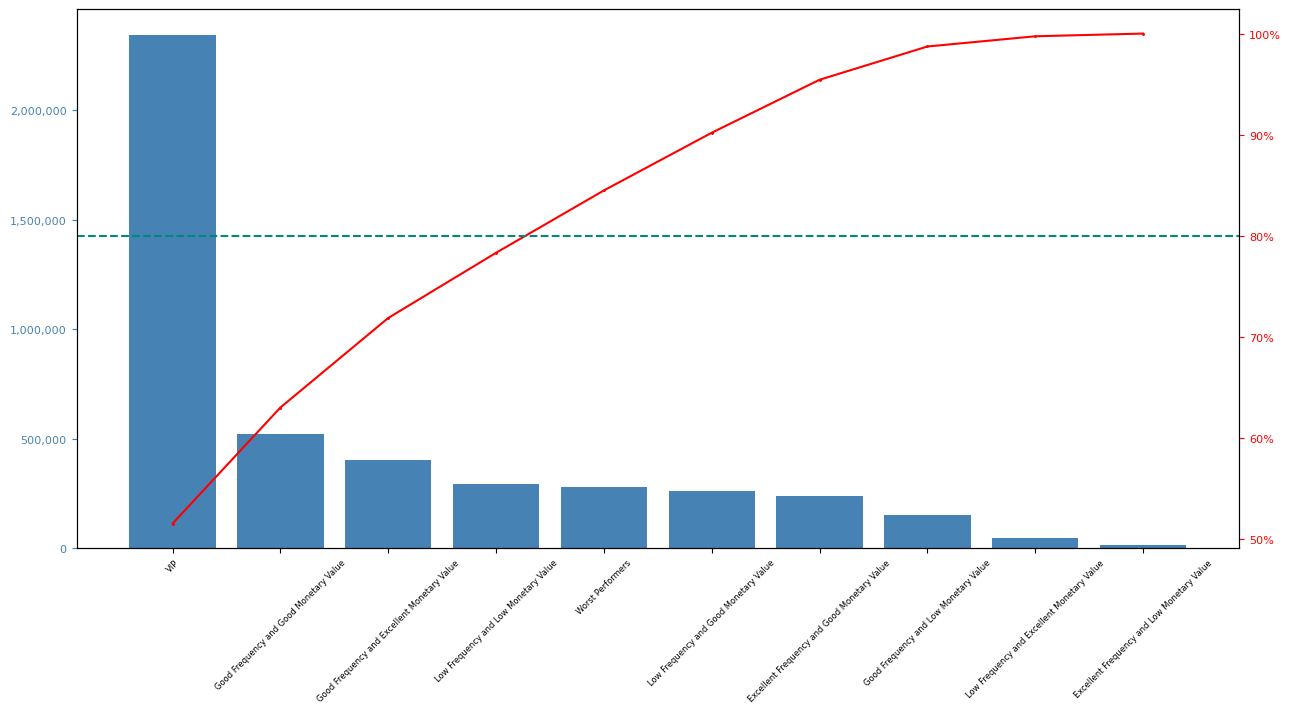

In [34]:
#The following is a Pareto Diagram for all monetary income
color1 = 'steelblue'
color2 = 'red'

fig, ax = plt.subplots(figsize= (15,7))
ax.bar(seg_pareto['segment_labels'], seg_pareto['monetary'], color=color1)


ax2 = ax.twinx()
ax2.plot(seg_pareto['segment_labels'], seg_pareto['cumulative_mon_%'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color = "#008878", linestyle = "dashed", alpha = 1 )


    
#specify axis colors
ax.tick_params(axis='y', colors=color1, labelsize= 8)
#ax.set_xticklabels([])
ax2.tick_params(axis='y', colors=color2, labelsize= 8)

ax.tick_params(axis='x', labelsize= 6, rotation=45)
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))

#ax.tick_params(axis='x', labelsize= )
#display Pareto chart
plt.show()